In [187]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def least_squares(x,df):
    return ((x-df["x_i"])**2).sum()/len(df["x_i"])

def weighted_least_squares(x,df):
    return (df["p_i"]*((x-df["x_i"])**2)).sum()

def make_plot(new_ax,minimum_x,minimum_y,df,plot_title):
    sns.set_style("whitegrid")
    df.plot(ax = new_ax, label='f (x)', title=plot_title)
    point_label = "min: ({},{:.2f})"
    point_label = point_label.format(minimum_x,minimum_y)
    new_ax.scatter(x=minimum_x, y=minimum_y, c='r', label=point_label)
    new_ax.axvline(minimum_x, color='r', ls='--')
    new_ax.axhline(minimum_y, color='r', ls='--')
    myticks = np.append(new_ax.get_xticks(),[minimum_x])
    new_ax.set_xticks(myticks)
    myticks = np.append(new_ax.get_yticks(),[minimum_y])
    new_ax.set_yticks(myticks)
    new_ax.legend(bbox_to_anchor=(1, 1))
    return new_ax

In [188]:
data = np.arange(start=1,stop=101) 

#Generating weights with sum 1
np.random.seed(1234)
number_ponderation = np.random.uniform(low=1,high=2,size=len(data))
df = pd.DataFrame(data={'x_i':data,'p_i':number_ponderation})
df['p_i'] = df['p_i']/df['p_i'].sum()
weights_sum = "Distribution sum: {:.2f}"
print(weights_sum.format(df['p_i'].sum()))

#Applying functions to data sample and calculating the minimum values
df_ls = df["x_i"].apply(lambda x: least_squares(x,df))
minimum_ls_x = round(df["x_i"].mean())
minimum_ls_y = least_squares(minimum_ls_x,df)

df_wls = df["x_i"].apply(lambda x: weighted_least_squares(x,df))
minimum_wls_x = round((df["p_i"]*df["x_i"]).sum())
minimum_wls_y = weighted_least_squares(minimum_wls_x,df)

Distribution sum: 1.00


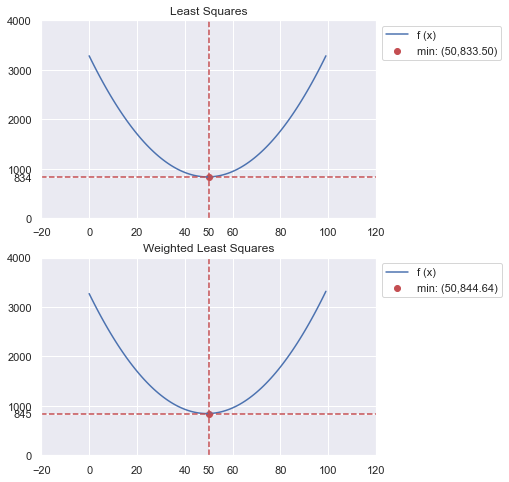

In [189]:
#Generating plots of functions
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1 = make_plot(new_ax=ax1, minimum_x=minimum_ls_x,minimum_y=minimum_ls_y,df=df_ls,plot_title='Least Squares')
ax2 = make_plot(new_ax=ax2, minimum_x=minimum_wls_x,minimum_y=minimum_wls_y,df=df_wls,plot_title='Weighted Least Squares')
fig.set_size_inches(6,8)